In [1]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [4]:
Data_path='//content/drive/MyDrive/archive (7)/IMDB Dataset.csv'
df = pd.read_csv(Data_path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

Text(0.5, 1.0, 'Sentiment Field Distribution\n25000\n25000')

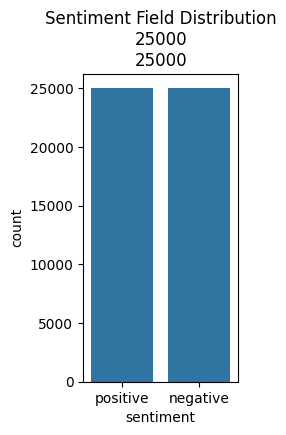

In [7]:
val_count=df["sentiment"].value_counts()
plt.figure(figsize= (2,4))
sns.countplot(data = df, x= 'sentiment')
plt.title(f'Sentiment Field Distribution\n{val_count.to_string(index=False, header=None)}')

In [8]:
df.loc[df["sentiment"] == 'positive', "sentiment"] = 1
df.loc[df["sentiment"] == 'negative', "sentiment"] = 0

In [9]:
df['sentiment'].unique()

array([1, 0], dtype=object)

In [10]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
stop_words = set(stopwords.words('english'))
def clean_text(sentence):
    # Removing URLS
    sentence = re.sub(r"https?://\S+|www\.\S+"," ",sentence)

    # Removing html tags
    sentence = re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});"," ",sentence)

    # Removing the Punctuation
    sentence = re.sub(r"[^\w\s]", " ", sentence)

    # Removing words that have numbers
    sentence = re.sub(r"\w*\d\w*", " ", sentence)

    # Removing Digits
    sentence = re.sub(r"[0-9]+", " ", sentence)

    # Cleaning white spaces
    sentence = re.sub(r"\s+", " ", sentence).strip()

    sentence = sentence.lower()
    # Check stop words
    tokens = []
    for token in sentence.split():
        if token not in stop_words:
            tokens.append(token)
    return " ".join(tokens)

In [12]:
df.loc[:, 'review'] = df['review'].apply(clean_text)

In [13]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter mattei love time money visually stunnin...,1


In [14]:
df['review'][1]


'wonderful little production filming technique unassuming old time bbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great master comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwell murals decorating every surface terribly well done'

In [15]:
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print("Train Data size:", len(X_train), len(y_train))
print("Test Data size", len(X_test), len(y_test))

Train Data size: 40000 40000
Test Data size 10000 10000


In [16]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

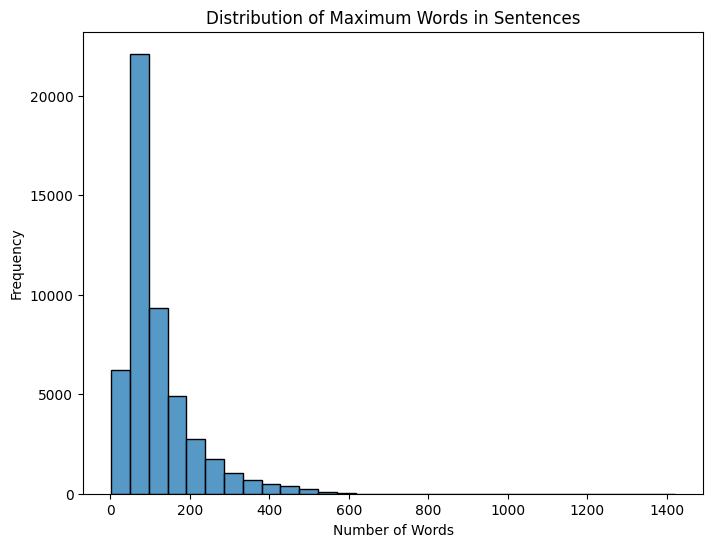

In [17]:
max_words = df['review'].apply(lambda x: len(x.split()))

# Plotting the distribution of the maximum number of words in sentences
plt.figure(figsize=(8, 6))
sns.histplot(max_words, bins=30)
plt.title('Distribution of Maximum Words in Sentences')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [18]:
max_len = 200  # Maximum words in each sequence.
batch_size=128

In [19]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [20]:
vocabulary_size = len(tokenizer.word_index)
vocabulary_size

91086

In [22]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2024-09-19 06:36:35--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-09-19 06:36:35--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-09-19 06:36:35--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [23]:
!unzip glove.6B.zip


Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Define the vocabulary size based on the tokenizer
vocabulary_size = len(tokenizer.word_index) + 1

# Load GloVe embeddings
embedding_index = {}
with open('/content/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create the embedding matrix
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, i in tokenizer.word_index.items():
    if i < vocabulary_size:  # Ensure the index is within bounds
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Define model with Bidirectional LSTM and pre-trained embeddings
model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=100,
                    weights=[embedding_matrix], trainable=False))  # Using pre-trained embeddings
model.add(Bidirectional(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2)))  # Bidirectional LSTM
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model with a lower learning rate for better convergence
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.00005), metrics=['accuracy'])

# Convert data to NumPy arrays and ensure proper type
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).astype('float32')  # Convert labels to float32
y_test = np.array(y_test).astype('float32')

# Pad sequences to ensure uniform input size
max_len = 100  # Set based on your dataset
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=128)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 216s 670ms/step - accuracy: 0.5141 - loss: 0.7045 - val_accuracy: 0.6573 - val_loss: 0.6598
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 208s 665ms/step - accuracy: 0.6111 - loss: 0.6554 - val_accuracy: 0.7572 - val_loss: 0.5172
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 263s 666ms/step - accuracy: 0.7056 - loss: 0.5803 - val_accuracy: 0.7713 - val_loss: 0.4919
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 259s 655ms/step - accuracy: 0.7282 - loss: 0.5543 - val_accuracy: 0.7806 - val_loss: 0.4754
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 259s 647ms/step - accuracy: 0.7402 - loss: 0.5350 - val_accuracy: 0.7823 - val_loss: 0.4636
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 268s 667ms/step - accuracy: 0.7448 - loss: 0.5296 - val_accuracy: 0.7905 - val_loss: 0.4533
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 262s 665ms/step - accuracy: 0.7565 - loss: 0.5131 - val_accuracy: 0.7960 - val_loss: 0.4461
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 258s 654ms/step - accuracy: 0.7580 -

In [26]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 100)            │       9,108,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         234,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,911,265 (37.81 MB)

 Trainable params: 267,521 (1.02 MB)

 Non-trainable params: 9,108,700 (34.75 MB)

 Optimizer params: 535,044 (2.04 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 111ms/step


Text(95.72222222222221, 0.5, 'Truth')

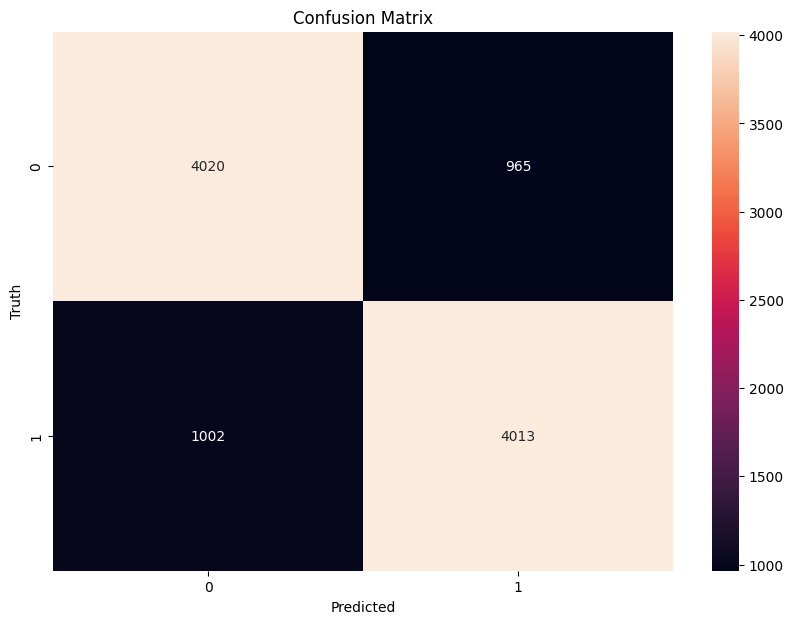

In [29]:
y_pred = model.predict(X_test)
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
print("Classification Report: \n", classification_report(y_test, y_pred_rounded))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.81      0.80      4985
         1.0       0.81      0.80      0.80      5015

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

